# Логистическая регрессия

## Пример 1 (двумерный случай)

В качестве набора данных рассмотрим [следующий датасет.](https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv)

Это демографические данные жителей пустыни Калахари (охотники-собиратели), собранные Нэнси Хауэлл в Ботсване в период с августа 1967 по май 1969 года.

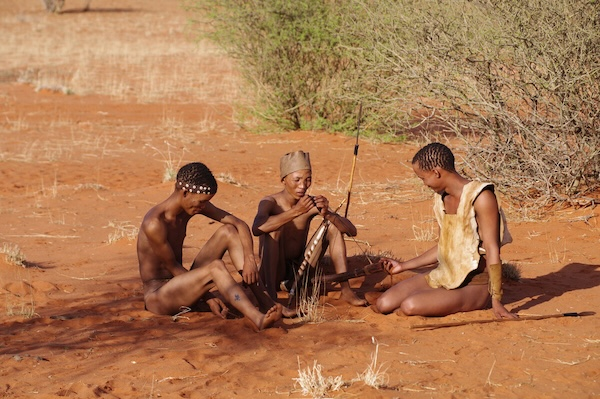

In [3]:
import numpy as np

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


Соберем выборку более ли менее «стандартных» людей:

In [5]:
df_sample = df[np.logical_and(df['age'] >= 18, df['age'] <= 50)]
df_sample.head()

,height,weight,age,male
3,156.845,53.041914,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


Визуализируем то, что у нас получилось:

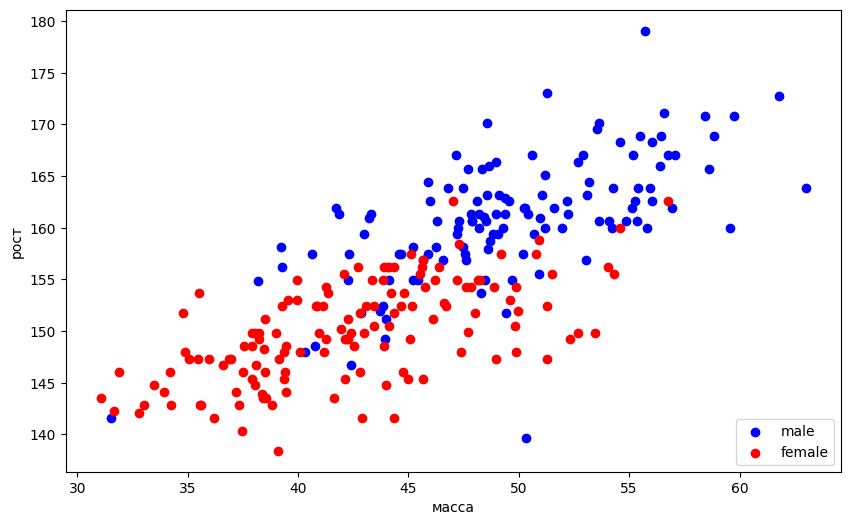

In [74]:
import matplotlib.pyplot as plt
def plot(df):
    plt.figure(figsize=(10,6))
    plt.scatter(df.weight[df.male == 1], df.height[df.male == 1], color='blue', label='male')
    plt.scatter(df.weight[df.male == 0], df.height[df.male == 0], color='red', label='female')
    plt.ylabel('рост')
    plt.xlabel('масса')
plot(df_sample)
plt.legend(loc=4)

### Построение модели

Используея библиотечную реализацию, построим классификатор. Разделим выборку на тренировочную и тестовую части, возраст учитывать не будем.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sample[['height', 'weight']], df_sample['male'], test_size=0.2, random_state=42)

Нормируем данные, обучим и оценим модель.

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(solver='lbfgs', random_state=42).fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.8181818181818182

Напомним, что в случае логистической регрессии мы имеем дело с моделью вида

$$
\mathbb{P}(C_1|x) = \frac{1}{1+e^{-w^Tx}}.
$$

Посмотрим, какие вероятности получаются на примере произвольного тестового данного.

In [70]:
lr.predict_proba(X_test_scaled[:1])

array([[0.54176077, 0.45823923]])

Коэффициенты модели

In [71]:
print('w_0: ', lr.intercept_)
print('w_1, w_2: ', lr.coef_)

w_0:  [-2.74733366]
w_1, w_2:  [[4.72284519 2.03491859]]


Можем построить разделяющую гиперплоскость

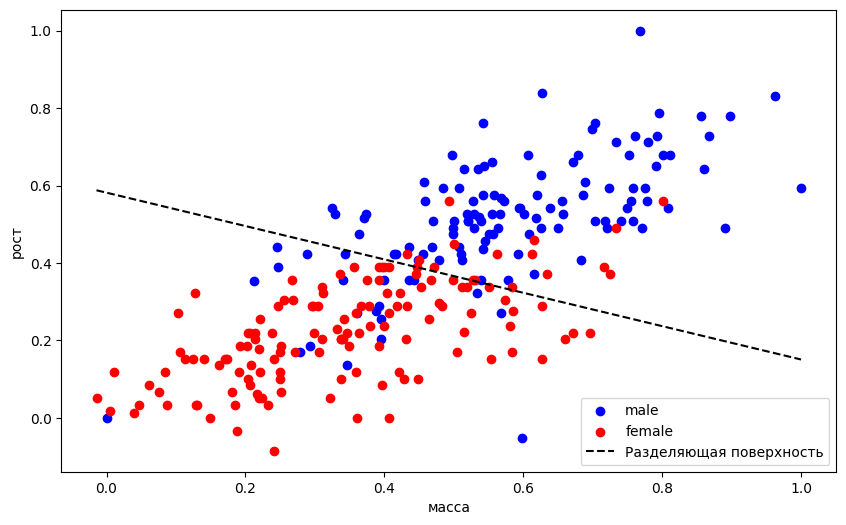

In [75]:
df_sample_scaled = pd.DataFrame(np.vstack((X_train_scaled, X_test_scaled)), columns=df_sample.columns[:2])
df_sample_scaled['male'] = np.hstack((np.array(y_train), np.array(y_test)))

plot(df_sample_scaled)
lims = np.arange(df_sample_scaled.weight.min(), df_sample_scaled.weight.max(), (df_sample_scaled.weight.max() - df_sample_scaled.weight.min())/1000)
separation = (-lr.intercept_ - lr.coef_[0][1] * lims)/lr.coef_[0][0]
plt.plot(lims, separation, color='black', linestyle='--', label='Разделяющая поверхность')
plt.legend(loc=4)

## Немного о настройке

In [76]:
!gdown 1X2qe5B6fuoFYWqRVg3opWZZOlHa0qH5o

Downloading...
From: https://drive.google.com/uc?id=1X2qe5B6fuoFYWqRVg3opWZZOlHa0qH5o
To: /content/spam_data.csv
100% 1.13M/1.13M [00:00<00:00, 29.2MB/s]


In [85]:
spam_data = pd.read_csv('spam_data.csv')
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.00,0.65,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.125,0.000,0.000,1.250,5,40,0
1,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0
2,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4597,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4598,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
4599,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1


In [86]:
X, y = spam_data.iloc[:, :-1].values, spam_data.iloc[:, -1].values

Выделим тренировочные и тестовые данные

In [87]:
X_train = X[:int(len(X) * 0.8)]
y_train = y[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]
y_test = y[int(len(X) * 0.8):]

In [88]:
lr = LogisticRegression(random_state=13, solver='lbfgs', max_iter=3000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=13)

In [90]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_test, lr.predict(X_test)))

0.9315217391304348
0.7980456026058632


А что не так?

In [91]:
print(y_train.mean(), y_test.mean())

0.24239130434782608 1.0


Жуткая несбалансированность классов!

Используем случайное «умное» разделение — `train_test_split`.


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 3)
print(y_train.mean(), y_test.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
print(y_train.mean(), y_test.mean())

0.38858695652173914 0.4158523344191097
0.39402173913043476 0.3941368078175896


In [93]:
y.sum()/len(y)

0.39404477287546186

Посмотрим, сильно ли правильное разделение улучшило результаты работы модели:

In [94]:
lr = LogisticRegression(solver='lbfgs', max_iter=3000)
lr.fit(X_train, y_train)

print(accuracy_score(y_train, lr.predict(X_train)))

print(accuracy_score(y_test, lr.predict(X_test)))

0.9385869565217392
0.9120521172638436


Можно пытаться сделать еще лучше. У модели есть разные параметры: например, способ и (или) коэффициент регуляризации. Наиболее популярные такие:
$$
\mathsf{Regloss}(a, \theta, X) = \mathsf{Loss}(a, \theta, X) + \lambda R(\theta), \quad R(\theta) = \sum\limits_{i = 0}^p |\theta_i| = \|\theta\|_1, \quad R(\theta) = {\sum\limits_{i = 0}^p \theta_i^2} = \|\theta\|_2^2.
$$

In [96]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty=None)
lr.fit(X_train, y_train)

print(accuracy_score(y_train, lr.predict(X_train)))

print(accuracy_score(y_test, lr.predict(X_test)))

0.938858695652174
0.9077090119435396


Поищем настройки на сетке, используя `GridSearch`. Конечно, просто так сравнить модели на тесте нельзя.

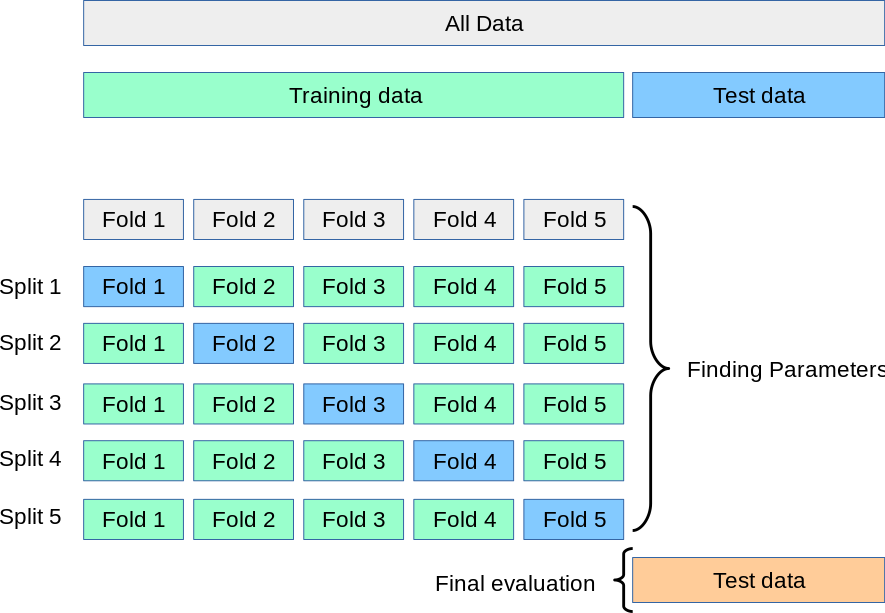

В нашем случае, выборка будет разделена на 5 частей, и на каждой из 5 итераций часть данных будет становиться тестовой выборкой, а другая часть — обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# Параметр C отвечает за коэффициент регуляризации (обратная зависимость)

parameter_grid = {
    'C': np.logspace(-5, 1),
    'penalty': ['l1', 'l2']
}
grid_searcher = GridSearchCV(estimator = LogisticRegression(solver='liblinear', max_iter=3000, random_state=13),
                             param_grid=parameter_grid,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=-1
                            )

In [100]:
%%time
grid_searcher.fit(X_train, y_train)

CPU times: user 538 ms, sys: 122 ms, total: 661 ms
Wall time: 14.1 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=13,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468...
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Что смогла наша новая модель?

In [102]:
print(accuracy_score(y_train, grid_searcher.predict(X_train)))
print(accuracy_score(y_test, grid_searcher.predict(X_test)))

0.9380434782608695
0.9142236699239956


Можно увидеть все результаты поиска по сетке

In [103]:
pd.DataFrame(grid_searcher.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013336,0.005784,0.002059,0.000249,0.000010,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.394022,0.394022,0.394022,0.394022,0.394022,0.394022,0.000000,87
1,0.015703,0.001640,0.001869,0.000106,0.000010,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.536685,0.567935,0.557065,0.557065,0.543478,0.552446,0.011058,82
2,0.010172,0.000671,0.002402,0.000641,0.000013,l1,"{'C': 1.3257113655901082e-05, 'penalty': 'l1'}",0.394022,0.394022,0.394022,0.394022,0.394022,0.394022,0.000000,87
3,0.016262,0.000714,0.001978,0.000062,0.000013,l2,"{'C': 1.3257113655901082e-05, 'penalty': 'l2'}",0.593750,0.604620,0.603261,0.604620,0.586957,0.598641,0.007117,81
4,0.010033,0.000771,0.001999,0.000209,0.000018,l1,"{'C': 1.757510624854793e-05, 'penalty': 'l1'}",0.394022,0.394022,0.394022,0.394022,0.394022,0.394022,0.000000,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.064991,0.010129,0.004822,0.005721,5.689866,l2,"{'C': 5.689866029018293, 'penalty': 'l2'}",0.923913,0.934783,0.932065,0.929348,0.937500,0.931522,0.004675,14
96,0.033954,0.011047,0.001989,0.000077,7.543120,l1,"{'C': 7.543120063354607, 'penalty': 'l1'}",0.922554,0.932065,0.932065,0.930707,0.936141,0.930707,0.004465,26
97,0.138911,0.053916,0.004024,0.004068,7.543120,l2,"{'C': 7.543120063354607, 'penalty': 'l2'}",0.923913,0.934783,0.932065,0.929348,0.937500,0.931522,0.004675,14
98,0.038527,0.017121,0.005641,0.004580,10.000000,l1,"{'C': 10.0, 'penalty': 'l1'}",0.922554,0.930707,0.933424,0.930707,0.936141,0.930707,0.004547,26


Лучшие параметры модели:

In [104]:
grid_searcher.best_params_

{'C': 0.7906043210907702, 'penalty': 'l1'}

Лучший скор на кросс-валидации:

In [105]:
grid_searcher.best_score_

0.9334239130434782

Лучшая модель

In [106]:
lr = grid_searcher.best_estimator_
lr

LogisticRegression(C=0.7906043210907702, max_iter=3000, penalty='l1',
                   random_state=13, solver='liblinear')

Оценка модели на кросс-валидации без всякого перебора

In [107]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr, X_train, y_train, scoring = 'accuracy', cv = 5)
print(cv_score)
print(cv_score.mean())

[0.92527174 0.9361413  0.93206522 0.93070652 0.94293478]
0.9334239130434782
